<a href="https://colab.research.google.com/github/Carvas91/Carlos_Vasconez_portfolio/blob/main/mini_batch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [3]:
word_index = reuters.get_word_index()
word_index

550378/550378 [==============================] - 1s 1us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [4]:
print('Training length:', len(train_data), '\nTest length:', len(test_data))


Training length: 8982 
Test length: 2246


In [5]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
reversed_word_index = {v: k for k, v in word_index.items()}
' '.join([reversed_word_index.get(i - 3, '(' + str(i)+ ')') for i in train_data[0]])

'(1) (2) (2) said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[0]

3

In [8]:
import numpy as np

def vectorize(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, sq in enumerate(seqs):
    results[i, sq] = 1
  return results

In [9]:
X_train = vectorize(train_data)
X_test = vectorize(test_data)

In [10]:
print('original values:\t' , train_data[0][:15])
print('vectorized values:\t', X_train[0][:15])

original values:	 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16]
vectorized values:	 [0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


In [11]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [12]:
train_labels[0]

3

In [13]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [16]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [17]:
from tensorflow.keras import optimizers

opt_func = optimizers.SGD(learning_rate=0.01)

In [18]:
model.compile(optimizer=opt_func,
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [19]:
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
281/281 [==============================] - 11s 33ms/step - loss: 2.3535 - accuracy: 0.4855 - precision: 0.9407 - val_loss: 1.8545 - val_accuracy: 0.5583 - val_precision: 0.9349
Epoch 2/30
281/281 [==============================] - 11s 39ms/step - loss: 1.6656 - accuracy: 0.6063 - precision: 0.9304 - val_loss: 1.6198 - val_accuracy: 0.6340 - val_precision: 0.9248
Epoch 3/30
281/281 [==============================] - 11s 38ms/step - loss: 1.4717 - accuracy: 0.6677 - precision: 0.9263 - val_loss: 1.4838 - val_accuracy: 0.6679 - val_precision: 0.9250
Epoch 4/30
281/281 [==============================] - 11s 39ms/step - loss: 1.3396 - accuracy: 0.7014 - precision: 0.9266 - val_loss: 1.3884 - val_accuracy: 0.6830 - val_precision: 0.9143
Epoch 5/30
281/281 [==============================] - 10s 34ms/step - loss: 1.2392 - accuracy: 0.7255 - precision: 0.9238 - val_loss: 1.3145 - val_accuracy: 0.7097 - val_precision: 0.9270
Epoch 6/30
281/281 [==============================] - 11s 38

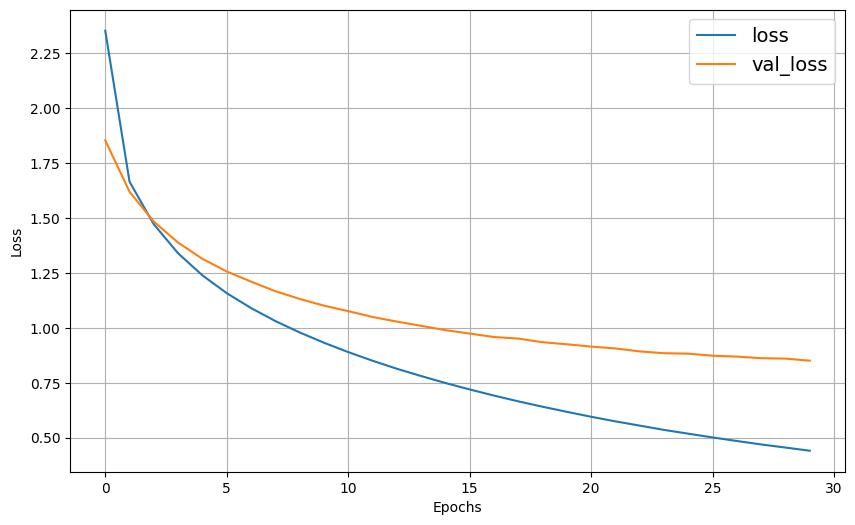

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize=14)
plt.show()

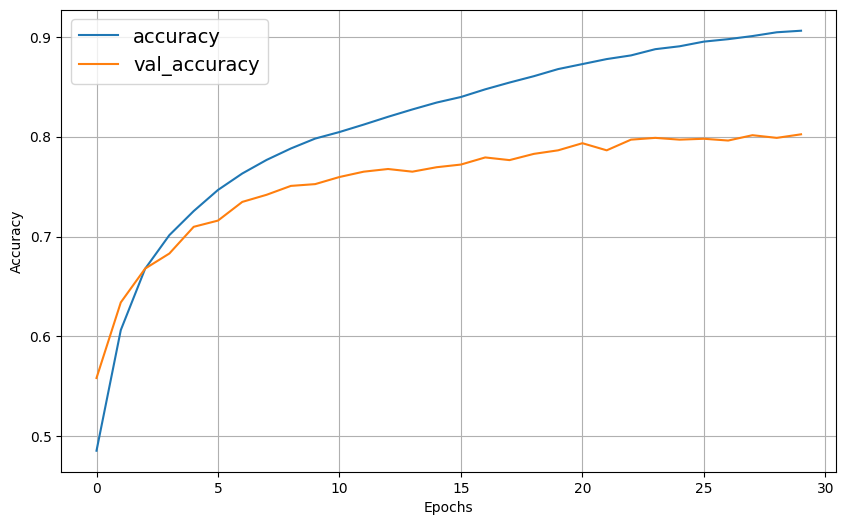

In [21]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10,6))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize=14)
plt.show()